In [1]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [2]:
%matplotlib inline

In [3]:
device=t.device('cpu') #Overrride the above device choice

### Generate the sample 2D distribution: uniform from unit circle.  

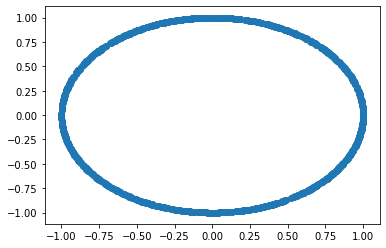

In [4]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
plt.scatter(data[:,0], data[:,1])

### GAN implementation

In [5]:
discriminator = Sequential(
    Linear(2,20),  
    LeakyReLU(0.2),
    Linear(20, 1), 
    Sigmoid()
) #dummy discriminator: please subsitute you own implementation 

In [6]:
generator = Sequential(
    Linear(2,500),
    LeakyReLU(0.1),
    
    Linear(500,200),
    LeakyReLU(0.1),
    
     Linear(200,100),
    LeakyReLU(0.1),
    
    Linear(100,100),
    LeakyReLU(0.1),
    
    Linear(100,50),
    LeakyReLU(0.1),
    
    Linear(50, 2),
    LeakyReLU(0.1),
)# dummy generator: please subsitute you own implementation 

In [7]:
discriminator = discriminator.to(device) 
generator= generator.to(device)

d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0001)
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)

loss = t.nn.BCELoss()

## Starting here

In [8]:
def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = t.ones(size, 1)

    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = t.zeros(size, 1)

    return data

In [9]:
def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake

In [10]:
def train_generator(optimizer, fake_data):
    # 2. Train Generator
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [11]:
def show(noise, fake, real):
    
    fig, axs = plt.subplots(1,3, figsize = (12,4))
    
    axs[0].set_title("noise")
    axs[1].set_title("fake")
    axs[2].set_title("real")
    
    axs[0].scatter(noise.data.cpu().numpy()[:,0],noise.data.cpu().numpy()[:,1], color = 'gray')
    axs[1].scatter(fake.data.cpu().numpy()[:,0], fake.data.cpu().numpy()[:,1], color = 'red')
    axs[2].scatter(real.data.cpu().numpy()[:,0], real.data.cpu().numpy()[:,1], color = 'green')

    fig.tight_layout()
    plt.show()

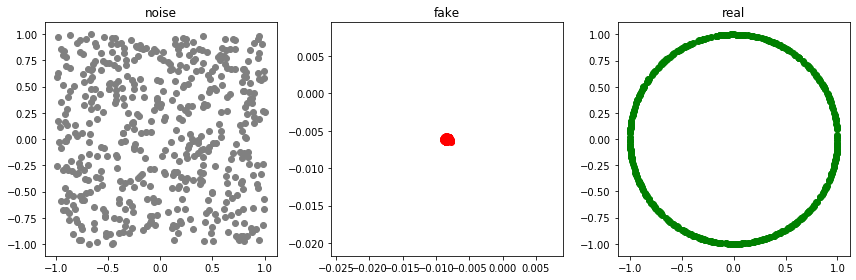

Epoch: 0 G-error: 0.6508915424346924 D-error: 1.413839340209961


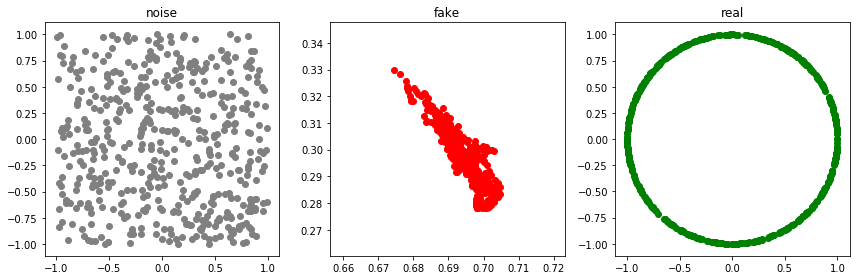

Epoch: 1000 G-error: 0.6614031791687012 D-error: 1.3946247100830078


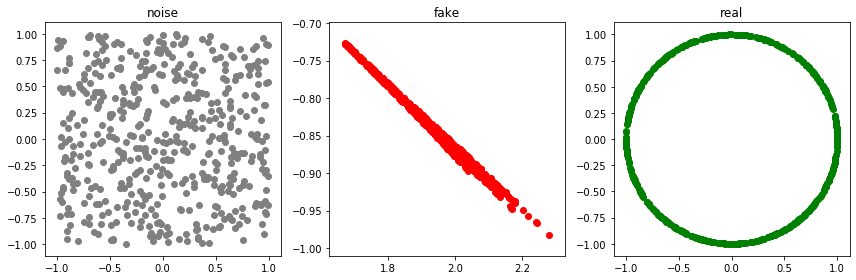

Epoch: 2000 G-error: 0.6745777726173401 D-error: 1.4412803649902344


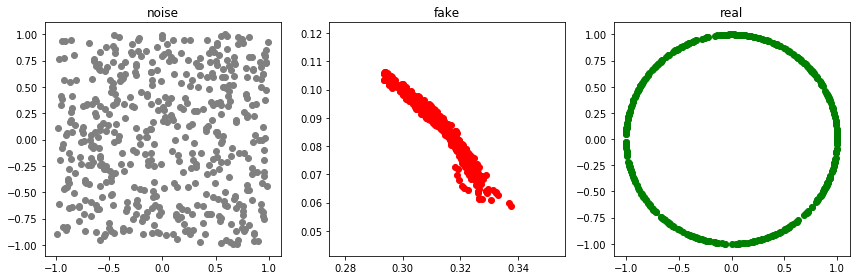

Epoch: 3000 G-error: 0.7063766717910767 D-error: 1.3954906463623047


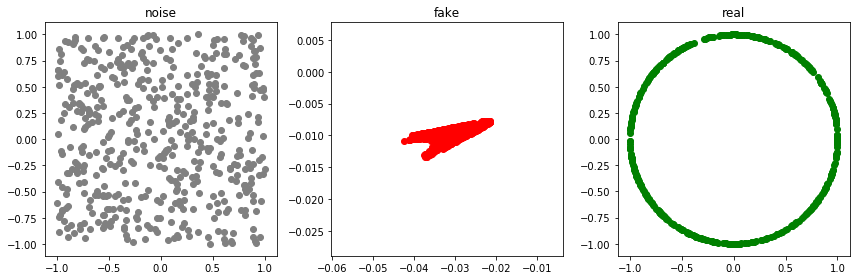

Epoch: 4000 G-error: 0.7265303730964661 D-error: 1.370779275894165


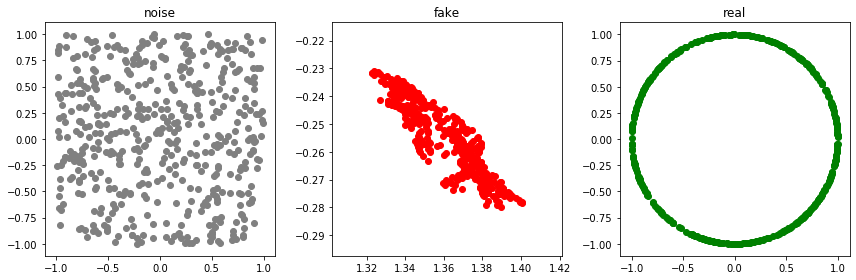

Epoch: 5000 G-error: 0.7228849530220032 D-error: 1.3741872310638428


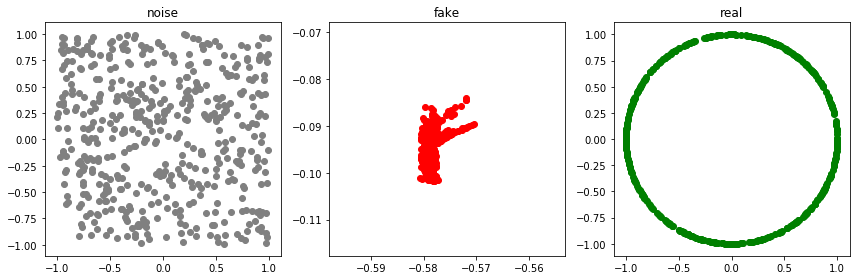

Epoch: 6000 G-error: 0.7217506766319275 D-error: 1.3531484603881836


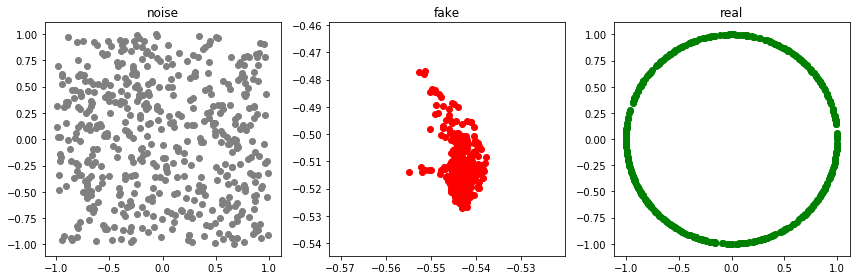

Epoch: 7000 G-error: 0.7093220353126526 D-error: 1.3777439594268799


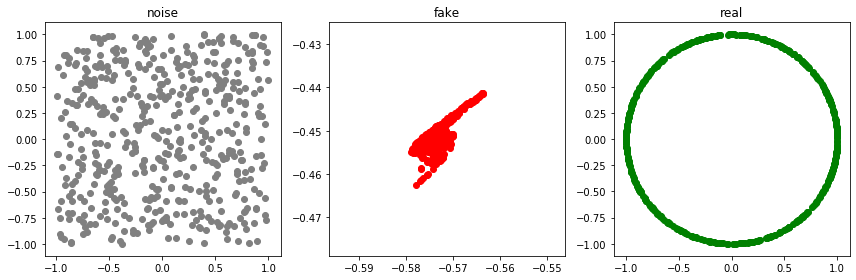

Epoch: 8000 G-error: 0.6983652710914612 D-error: 1.389972448348999


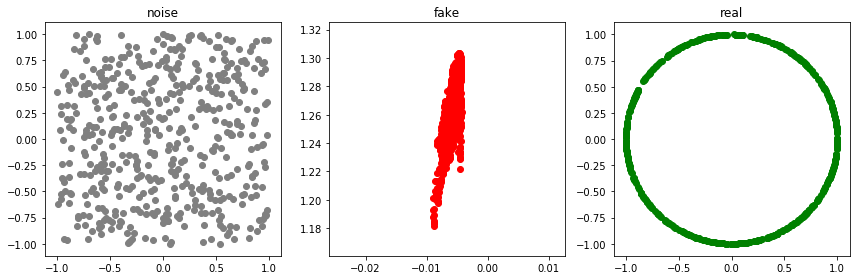

Epoch: 9000 G-error: 0.6611467599868774 D-error: 1.4255256652832031


In [12]:
num_epochs = 10000
sample_size = 500

for epoch in range(num_epochs):
    
    # real data
    angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
    data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
    real_data = t.from_numpy(data)
    
    # train discriminator:
    noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
    fake_data = generator(noise)#.detach()    
    d_error = train_discriminator(d_optimizer, real_data, fake_data)
    
    # train generator       - tryu with detach and without  
    noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
    fake_data = generator(noise)#.detach()    
    g_error = train_generator(g_optimizer, fake_data)

    #noise = torch.randn(batch_size, 100)
    #    fake_data = generator(noise)
    #g_error = train_generator(g_optimizer, fake_data)
  
    
    if epoch%1000 ==0:
        show(noise, fake_data, real_data)
        print(f"Epoch: {epoch} G-error: {g_error.item()} D-error: {d_error.item()}")


 batch_size = real_batch.shape[0]
        
        # 1. Train Discriminator
        real_data = real_batch
        # Generate fake data
        noise = torch.randn(batch_size, 100)
        fake_data = generator(noise).detach()
        # Train D
        d_error = train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        noise = torch.randn(batch_size, 100)
        fake_data = generator(noise)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log error

## Final result

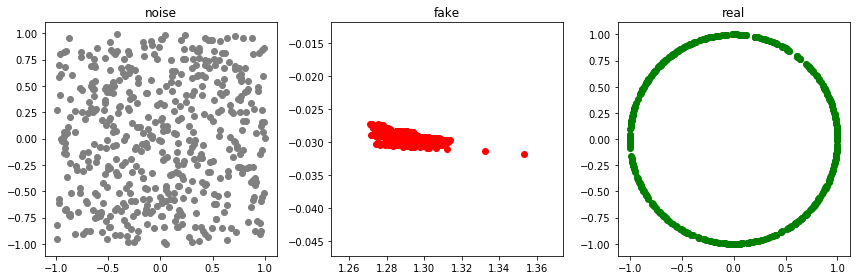

In [13]:
angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
real_data = t.from_numpy(data)
    
    #fake data:
noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
fake_data = generator(noise).detach()

show(noise, fake_data, real_data)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 